# Assignment 1
### Understanding Uncertainty
### Helen Corbat
### Due 9/5

1. Create a new public repo on Github under your account. Include a readme file.
2. Clone it to your machine. Put this file into that repo.
3. Use the following function to download the example data for the course:

In [45]:
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download complete
Extracting data files...
Data extracted


4. Open one of the datasets using Pandas:
    1. `ames_prices.csv`: Housing characteristics and prices
    2. `college_completion.csv`: Public, nonprofit, and for-profit educational institutions, graduation rates, and financial aid
    3. `ForeignGifts_edu.csv`: Monetary and in-kind transfers from foreign entities to U.S. educational institutions
    4. `iowa.csv`: Liquor sales in Iowa, at the transaction level
    5. `metabric.csv`: Cancer patient and outcome data
    6. `mn_police_use_of_force.csv`: Records of physical altercations between Minnessota police and private citizens
    7. `nhanes_data_17_18.csv`: National Health and Nutrition Examination Survey
    8. `tuna.csv`: Yellowfin Tuna Genome (I don't recommend this one; it's just a sequence of G, C, A, T )
    9. `va_procurement.csv`: Public spending by the state of Virginia

In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv("iowa.csv")
print(f'columns: {df.columns}')
df.head()

columns: Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')


,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


5. Pick two or three variables and briefly analyze them
    - Is it a categorical or numeric variable?
    - How many missing values are there? (`df['var'].isna()` and `np.sum()`)
    - If categorical, tabulate the values (`df['var'].value_counts()`) and if numeric, get a summary (`df['var'].describe()`)

### I chose the vairables of Bottle Volume (ml) and Category Name. Category name is categorical vairable and bottle volume is numerical vairable.

In [50]:
missing_volume =np.sum(df["Bottle Volume (ml)"].isna())
missing_volume

0

In [51]:
missing_category = np.sum(df["Category Name"].isna())
missing_category

133

Bottle volume has 0 missing values where category name has a total of 133 missing values.

In [47]:
volume_summary = df["Bottle Volume (ml)"].describe()
alcohol_category = df["Category Name"].value_counts()
volume_sold = (df.loc[:,["Category Name", "Bottle Volume (ml)"]].groupby("Category Name").sum()).sort_values("Bottle Volume (ml)", ascending=False)
volume_sold

,Bottle Volume (ml)
Category Name,
AMERICAN VODKAS,16009850
CANADIAN WHISKIES,14463900
STRAIGHT BOURBON WHISKIES,8819300
SPICED RUM,6947825
VODKA 80 PROOF,6790400
...,...
ROCK & RYE,10500
LOW PROOF VODKA,8250
ANISETTE,5250


In [48]:
volume_summary

count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64

In [49]:
alcohol_category.reset_index()

,Category Name,count
0,AMERICAN VODKAS,16611
1,CANADIAN WHISKIES,15280
2,STRAIGHT BOURBON WHISKIES,10416
3,WHISKEY LIQUEUR,7789
4,SPICED RUM,7379
...,...,...
87,ROCK & RYE,14
88,LOW PROOF VODKA,11
89,ANISETTE,7
90,WHITE CREME DE MENTHE,6


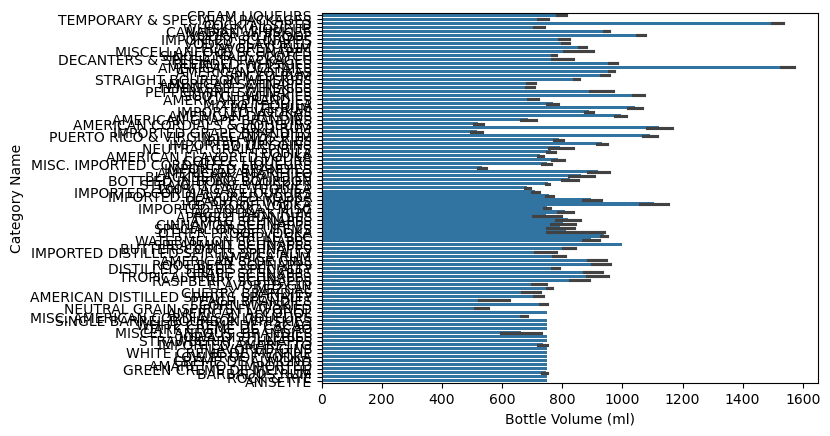

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x= "Bottle Volume (ml)", y="Category Name", data=df.sort_values("Bottle Volume (ml)", ascending=False))
plt.show()

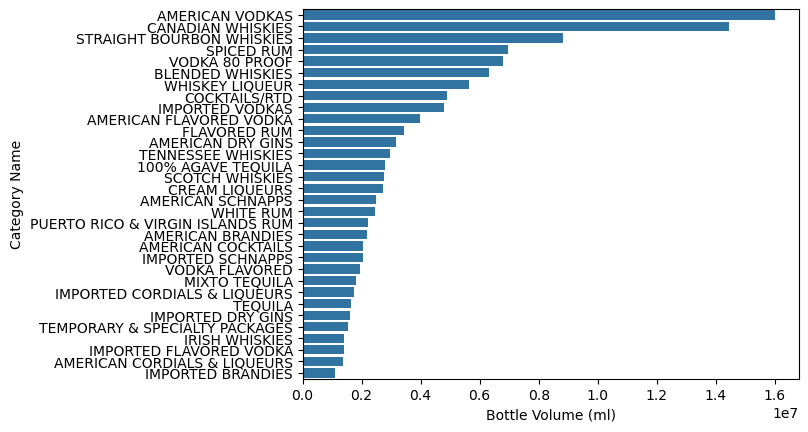

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
filter_df = volume_sold.loc[volume_sold["Bottle Volume (ml)"]>1000000]
sns.barplot(x = "Bottle Volume (ml)", y="Category Name", data=filter_df,orient='h')
plt.show() 

6. What are some questions and prediction tools you could create using these data? Who would the stakeholder be for that prediction tool? What practical or ethical questions would it create? What other data would you want, that are not available in your data?

we could use the sale data to understand what alcohol brands are more popular; therefore, more profitable. The potential stakholder could be store owners. Demographical information of the customers would be useful. However, customers might not be willing to share their personal information.

7. Commit your work to the repo (`git commit -am 'Finish assignment'` at the command line, or use the Git panel in VS Code). Push your work back to Github and submit the link on Canvas in the assignment tab.